In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

monowarislamshishir_vechicle_path = kagglehub.dataset_download('monowarislamshishir/vechicle')
monowarislamshishir_traffic_f_path = kagglehub.dataset_download('monowarislamshishir/traffic-f')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import os

# Check dataset structure
print("Dataset Structure:")
for dirname, _, filenames in os.walk('/kaggle/input/vechicle'):
    print(dirname)

# Count images
train_imgs = len(os.listdir('/kaggle/input/vechicle/train/images'))
valid_imgs = len(os.listdir('/kaggle/input/vechicle/valid/images'))
test_imgs = len(os.listdir('/kaggle/input/vechicle/test/images'))

print(f"\n✓ Train images: {train_imgs}")
print(f"✓ Valid images: {valid_imgs}")
print(f"✓ Test images: {test_imgs}")

Dataset Structure:
/kaggle/input/vechicle
/kaggle/input/vechicle/valid
/kaggle/input/vechicle/valid/labels
/kaggle/input/vechicle/valid/images
/kaggle/input/vechicle/test
/kaggle/input/vechicle/test/labels
/kaggle/input/vechicle/test/images
/kaggle/input/vechicle/train
/kaggle/input/vechicle/train/labels
/kaggle/input/vechicle/train/images

✓ Train images: 82
✓ Valid images: 23
✓ Test images: 12


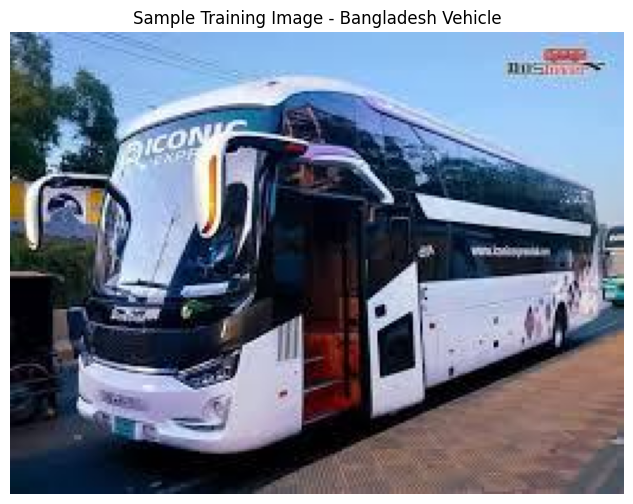

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Show sample training image
img_path = '/kaggle/input/vechicle/train/images/' + os.listdir('/kaggle/input/vechicle/train/images')[0]
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.title("Sample Training Image - Bangladesh Vehicle")
plt.axis('off')
plt.show()

In [ ]:
# Install Ultralytics YOLOv8
!pip install ultralytics -q

from ultralytics import YOLO
print("✓ YOLOv8 installed successfully!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 41.5 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✓ YOLOv8 installed successfully!


In [ ]:
# Create data.yaml
config = """
train: /kaggle/input/vechicle/train/images
val: /kaggle/input/vechicle/valid/images
test: /kaggle/input/vechicle/test/images

nc: 3
names: ['car', 'cng', 'bus']
"""

with open('/kaggle/working/data.yaml', 'w') as f:
    f.write(config)

print("✓ Config created")
!cat /kaggle/working/data.yaml

✓ Config created

train: /kaggle/input/vechicle/train/images
val: /kaggle/input/vechicle/valid/images
test: /kaggle/input/vechicle/test/images

nc: 3
names: ['car', 'cng', 'bus']


In [ ]:
# Load pretrained YOLOv8 nano model
model = YOLO('yolov8n.pt')

# Train the model
results = model.train(
    data='/kaggle/working/data.yaml',
    epochs=50,
    imgsz=640,
    batch=8,
    name='bangladesh_vehicle',
    patience=10
)

print("✓ Training complete!")

Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=bangladesh_vehicle2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, 

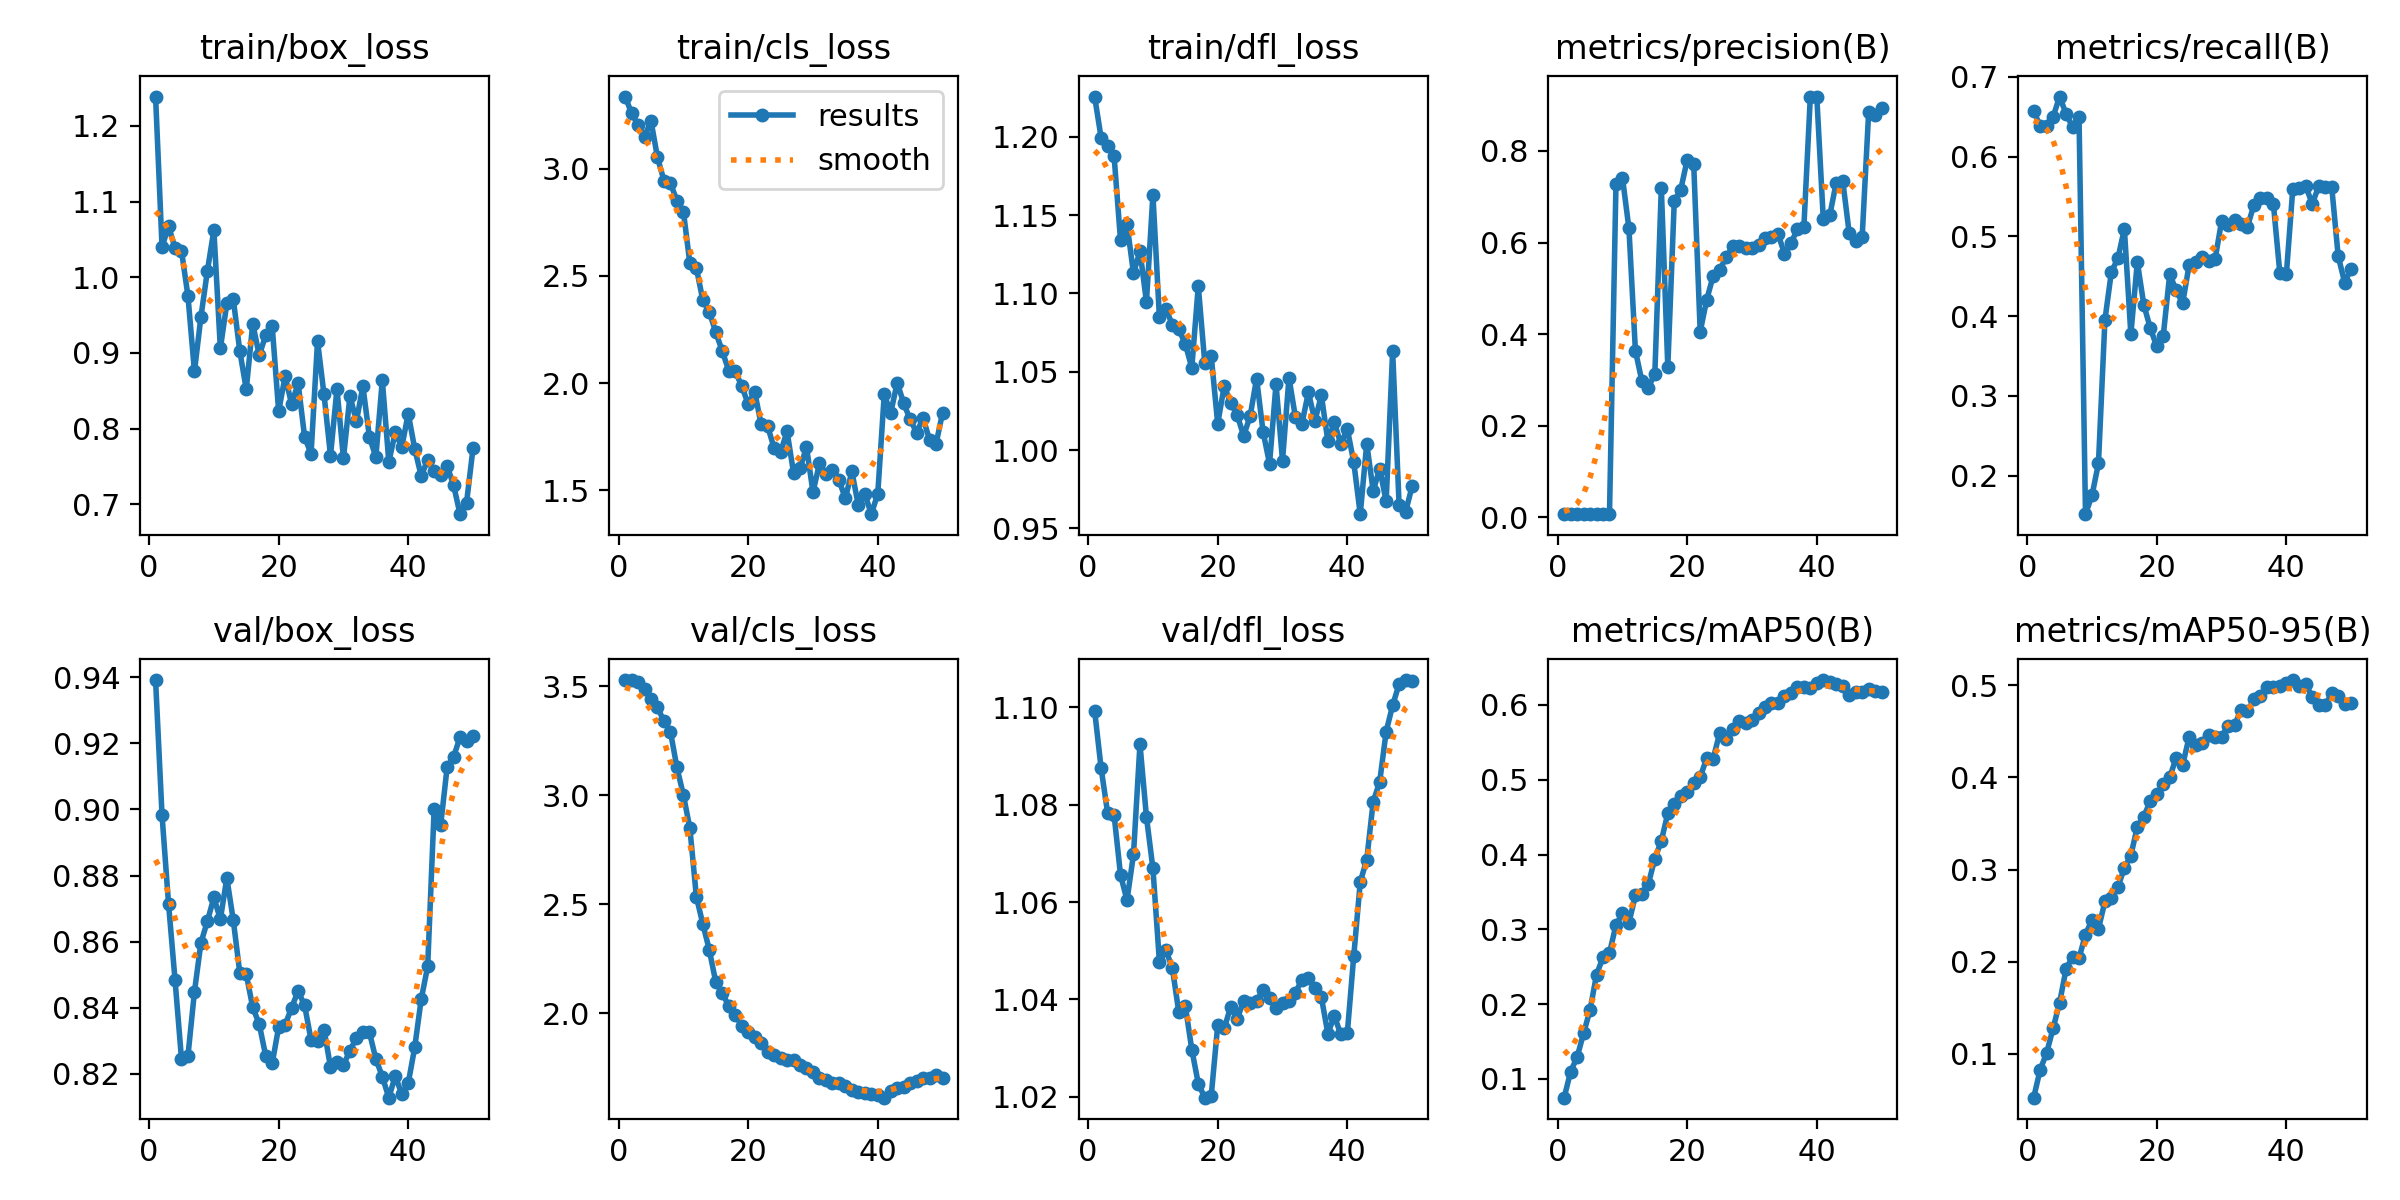

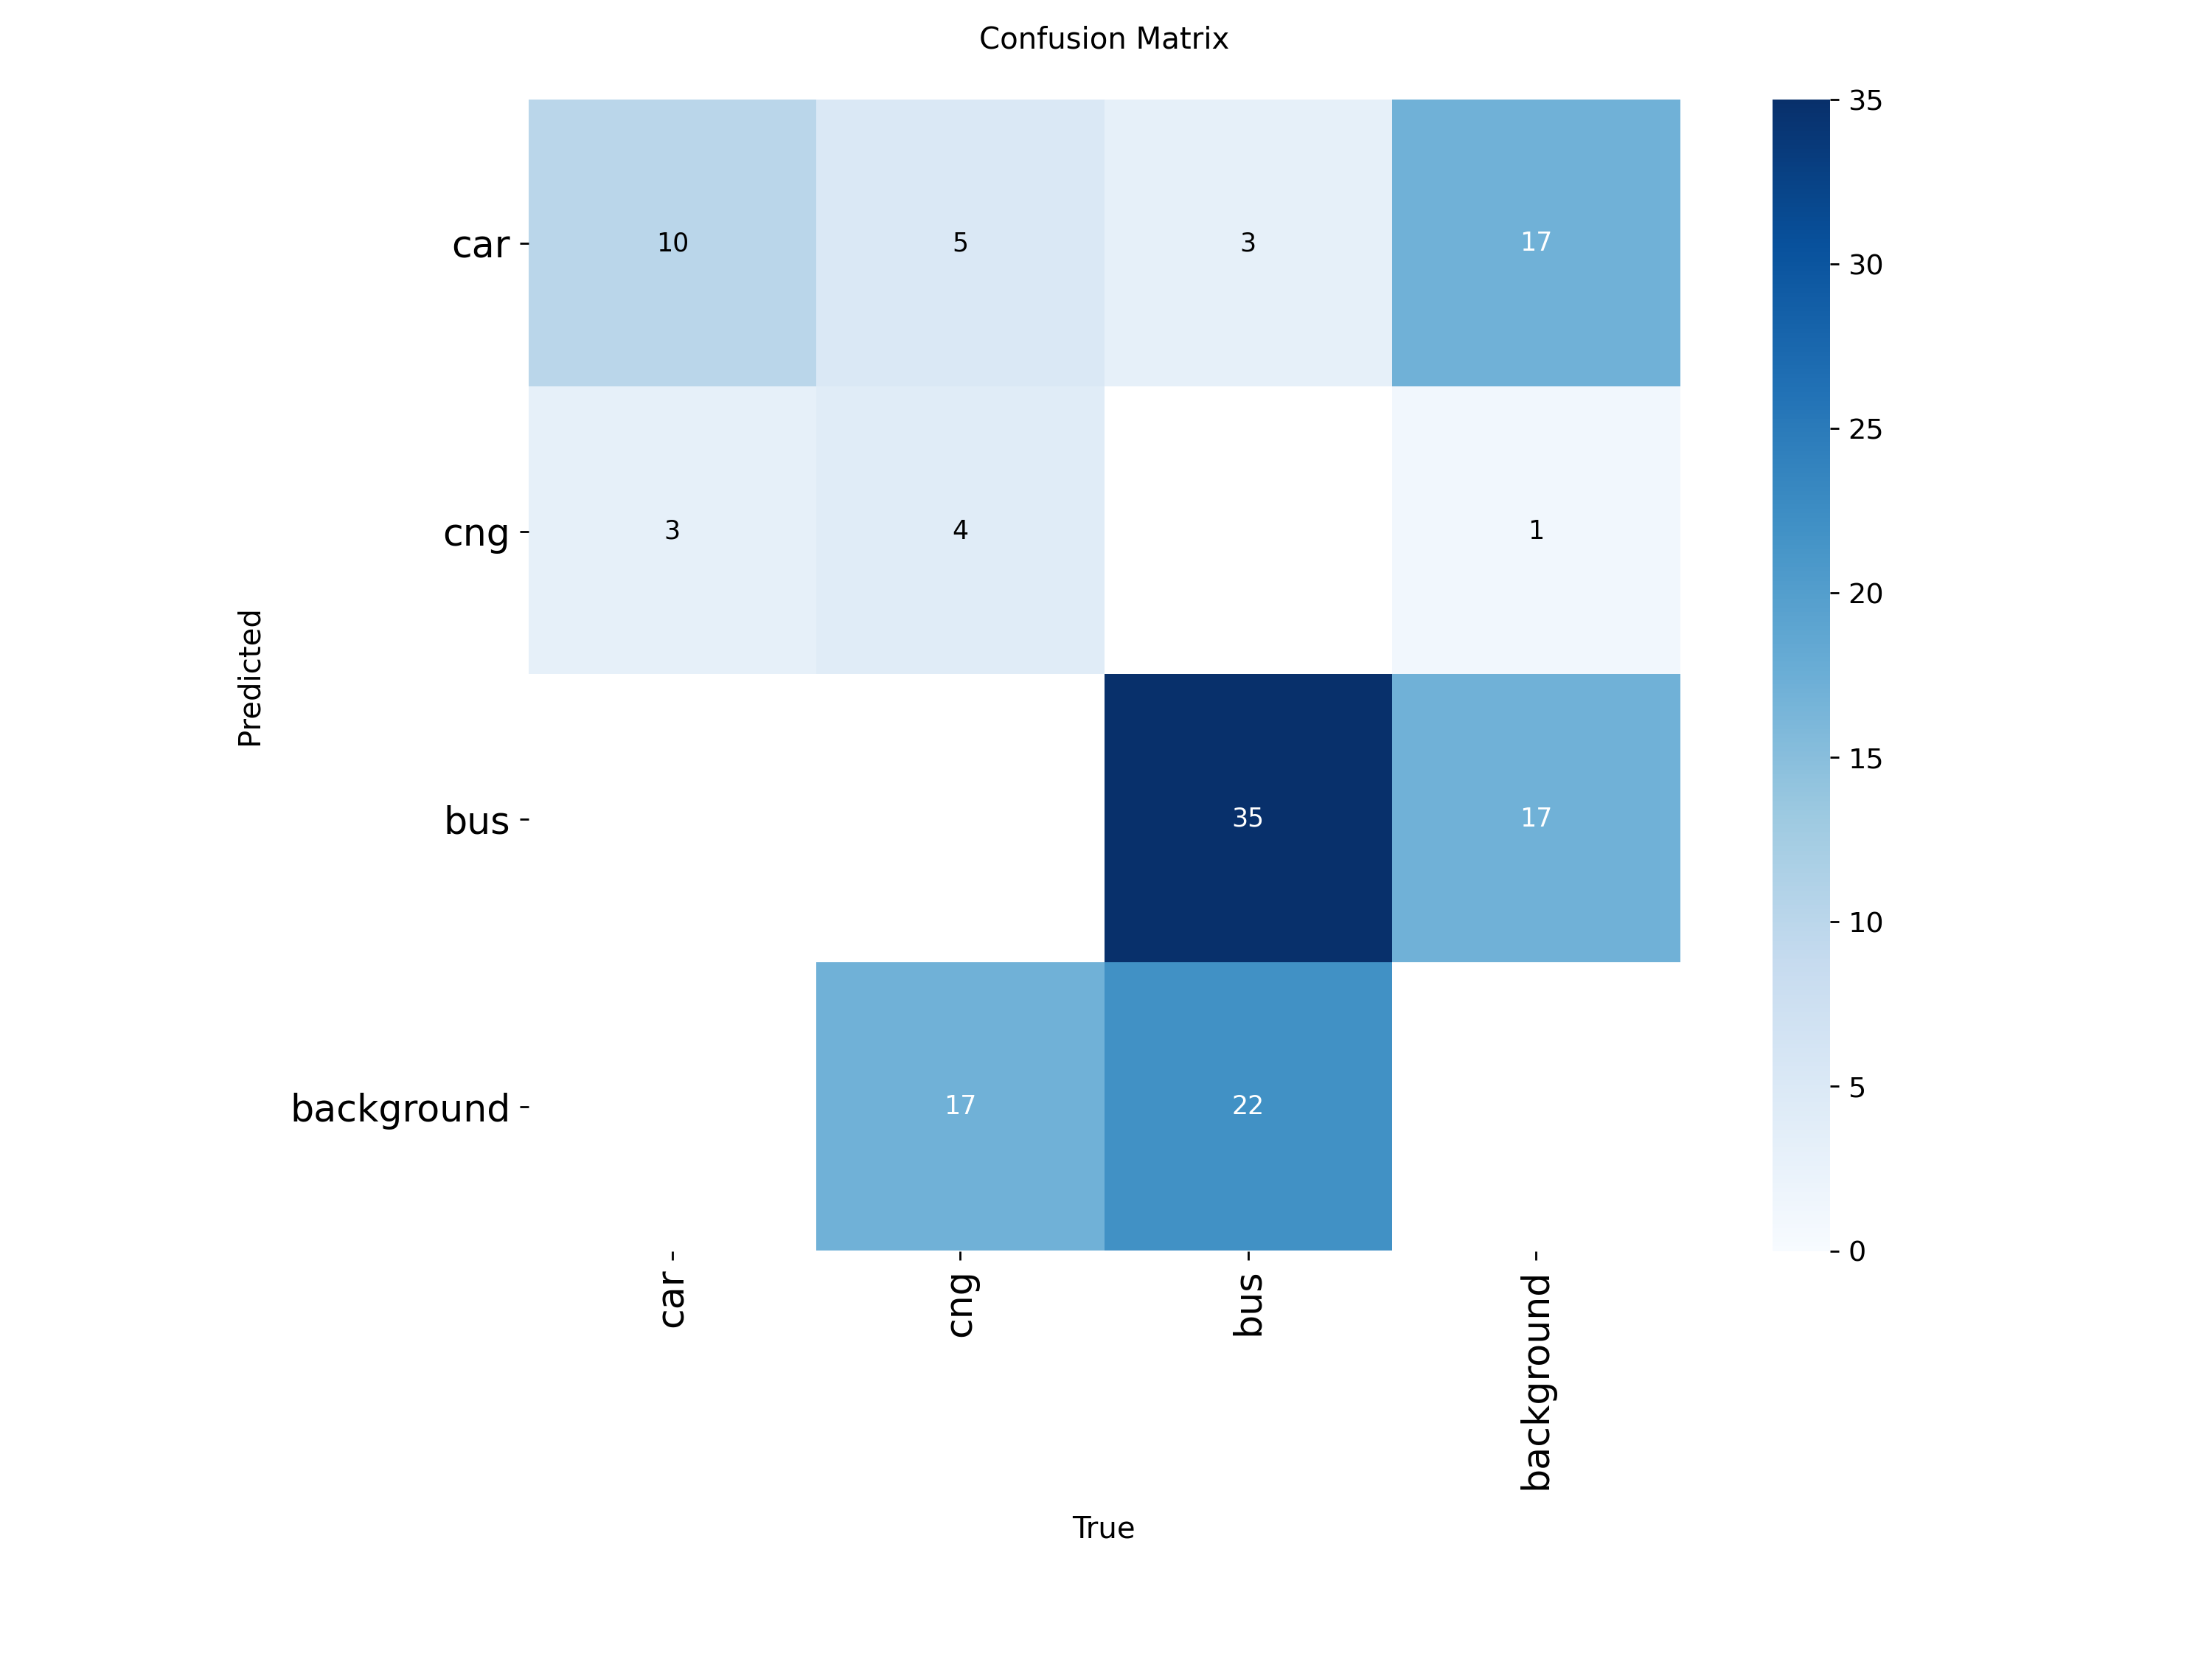

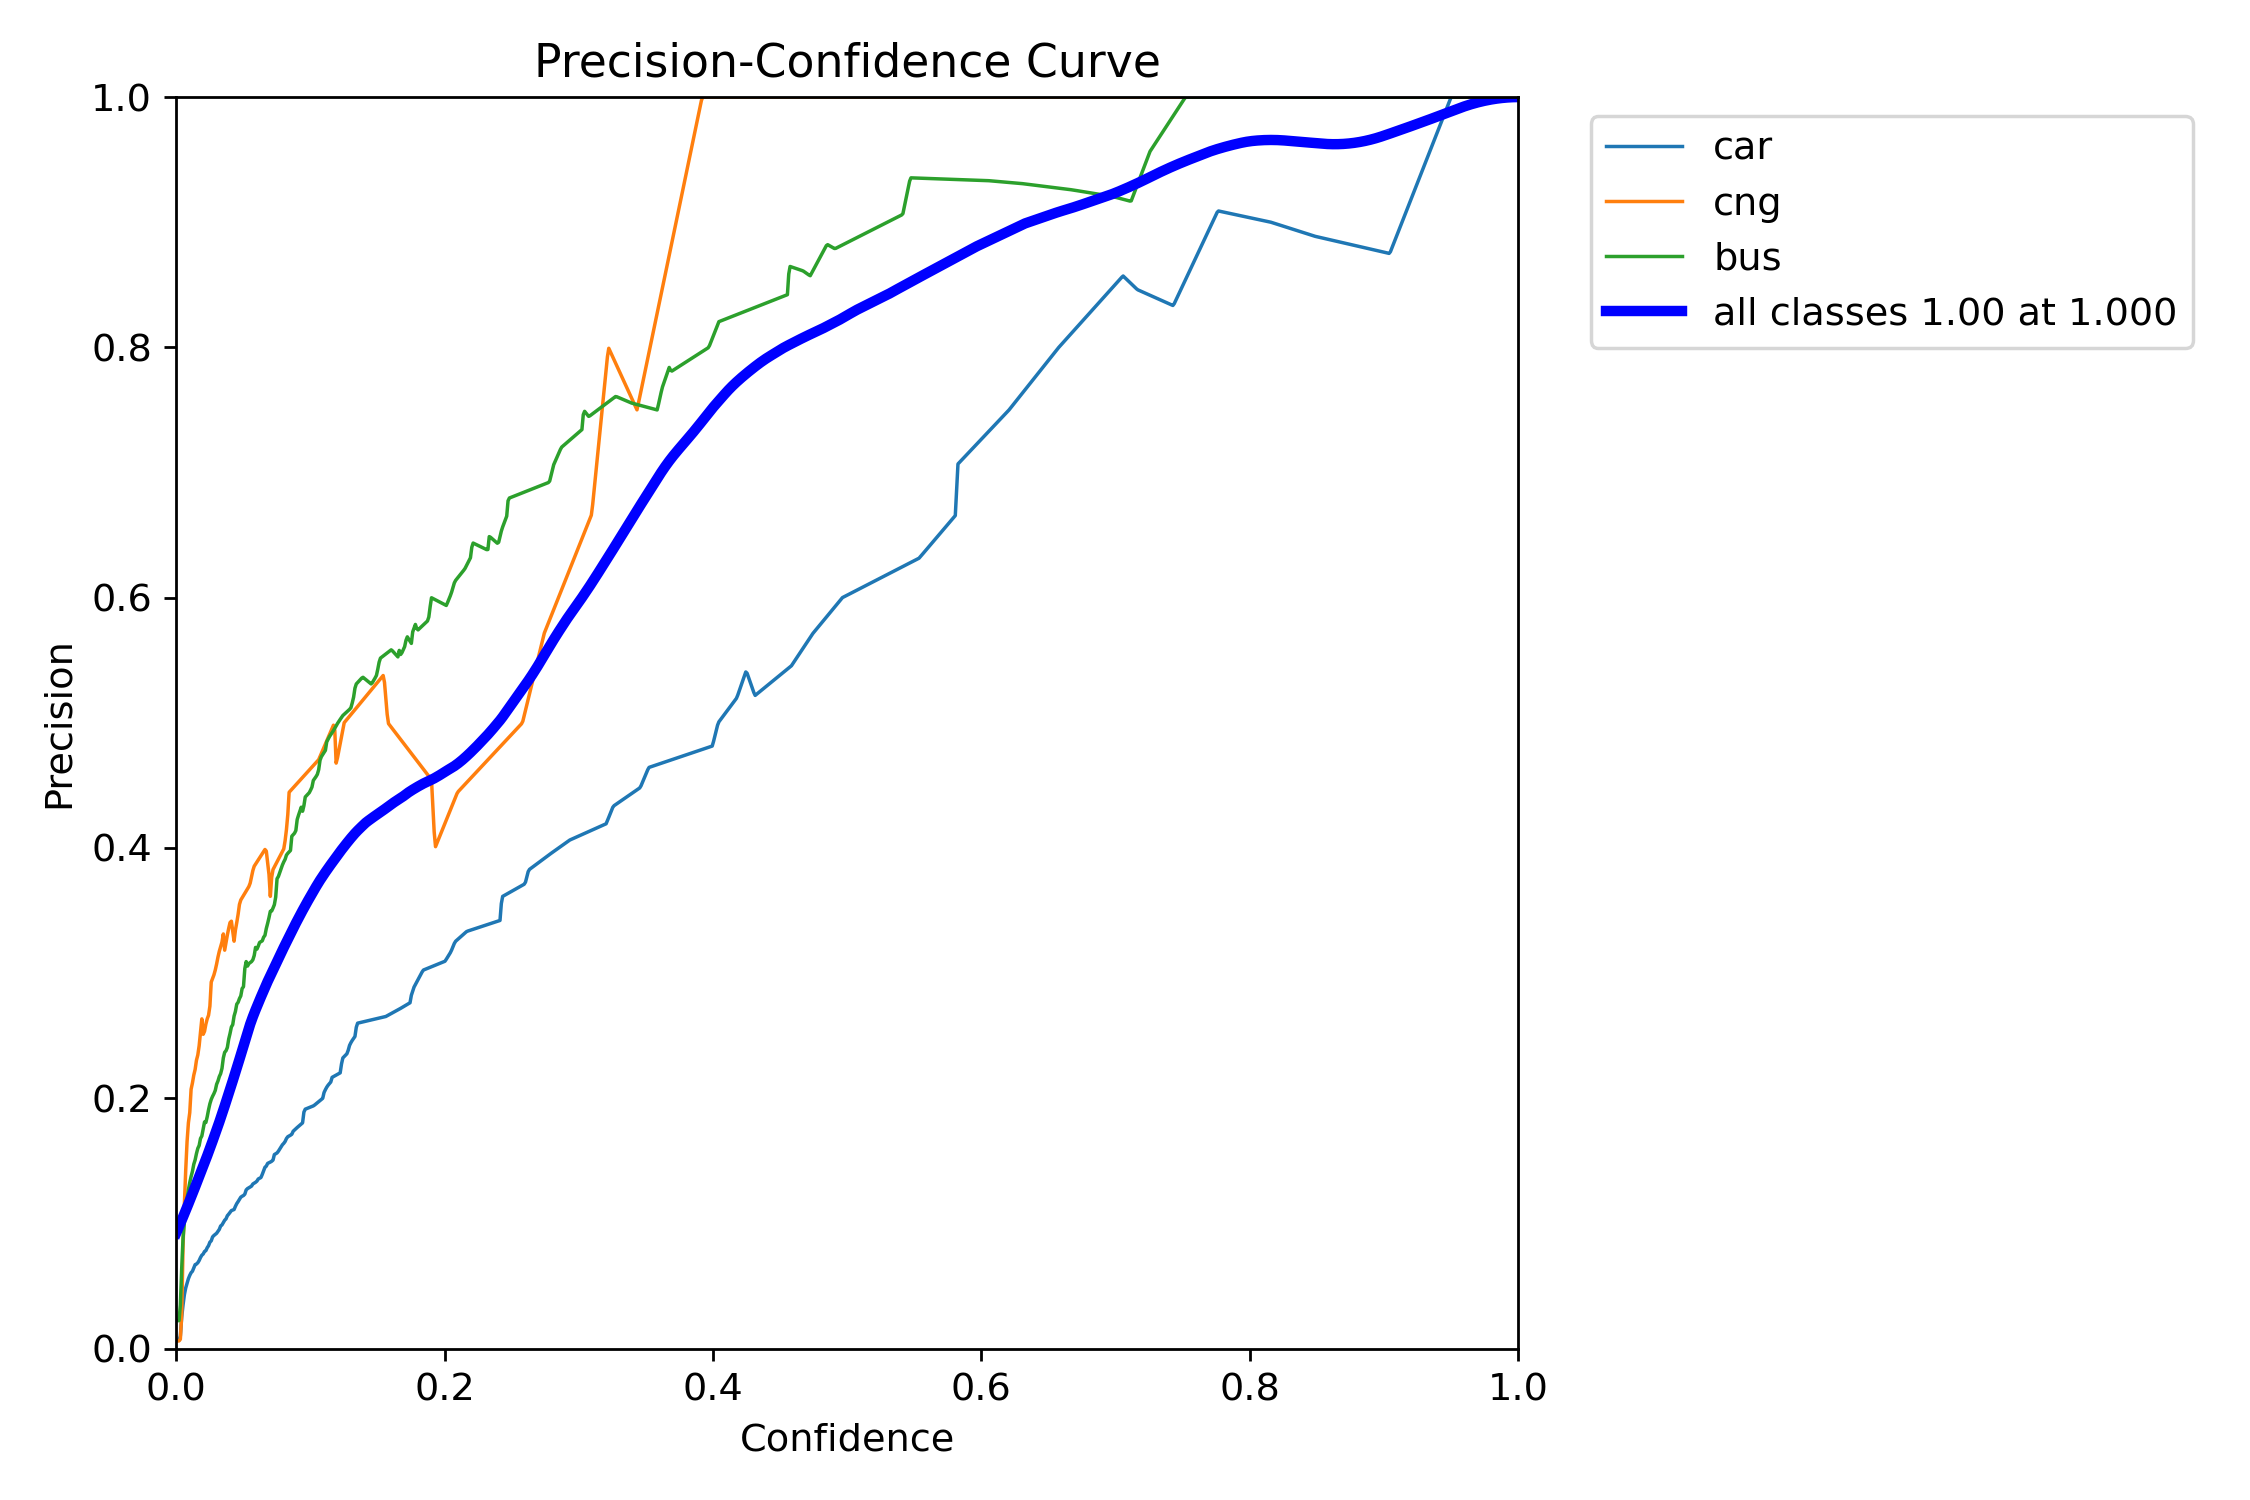

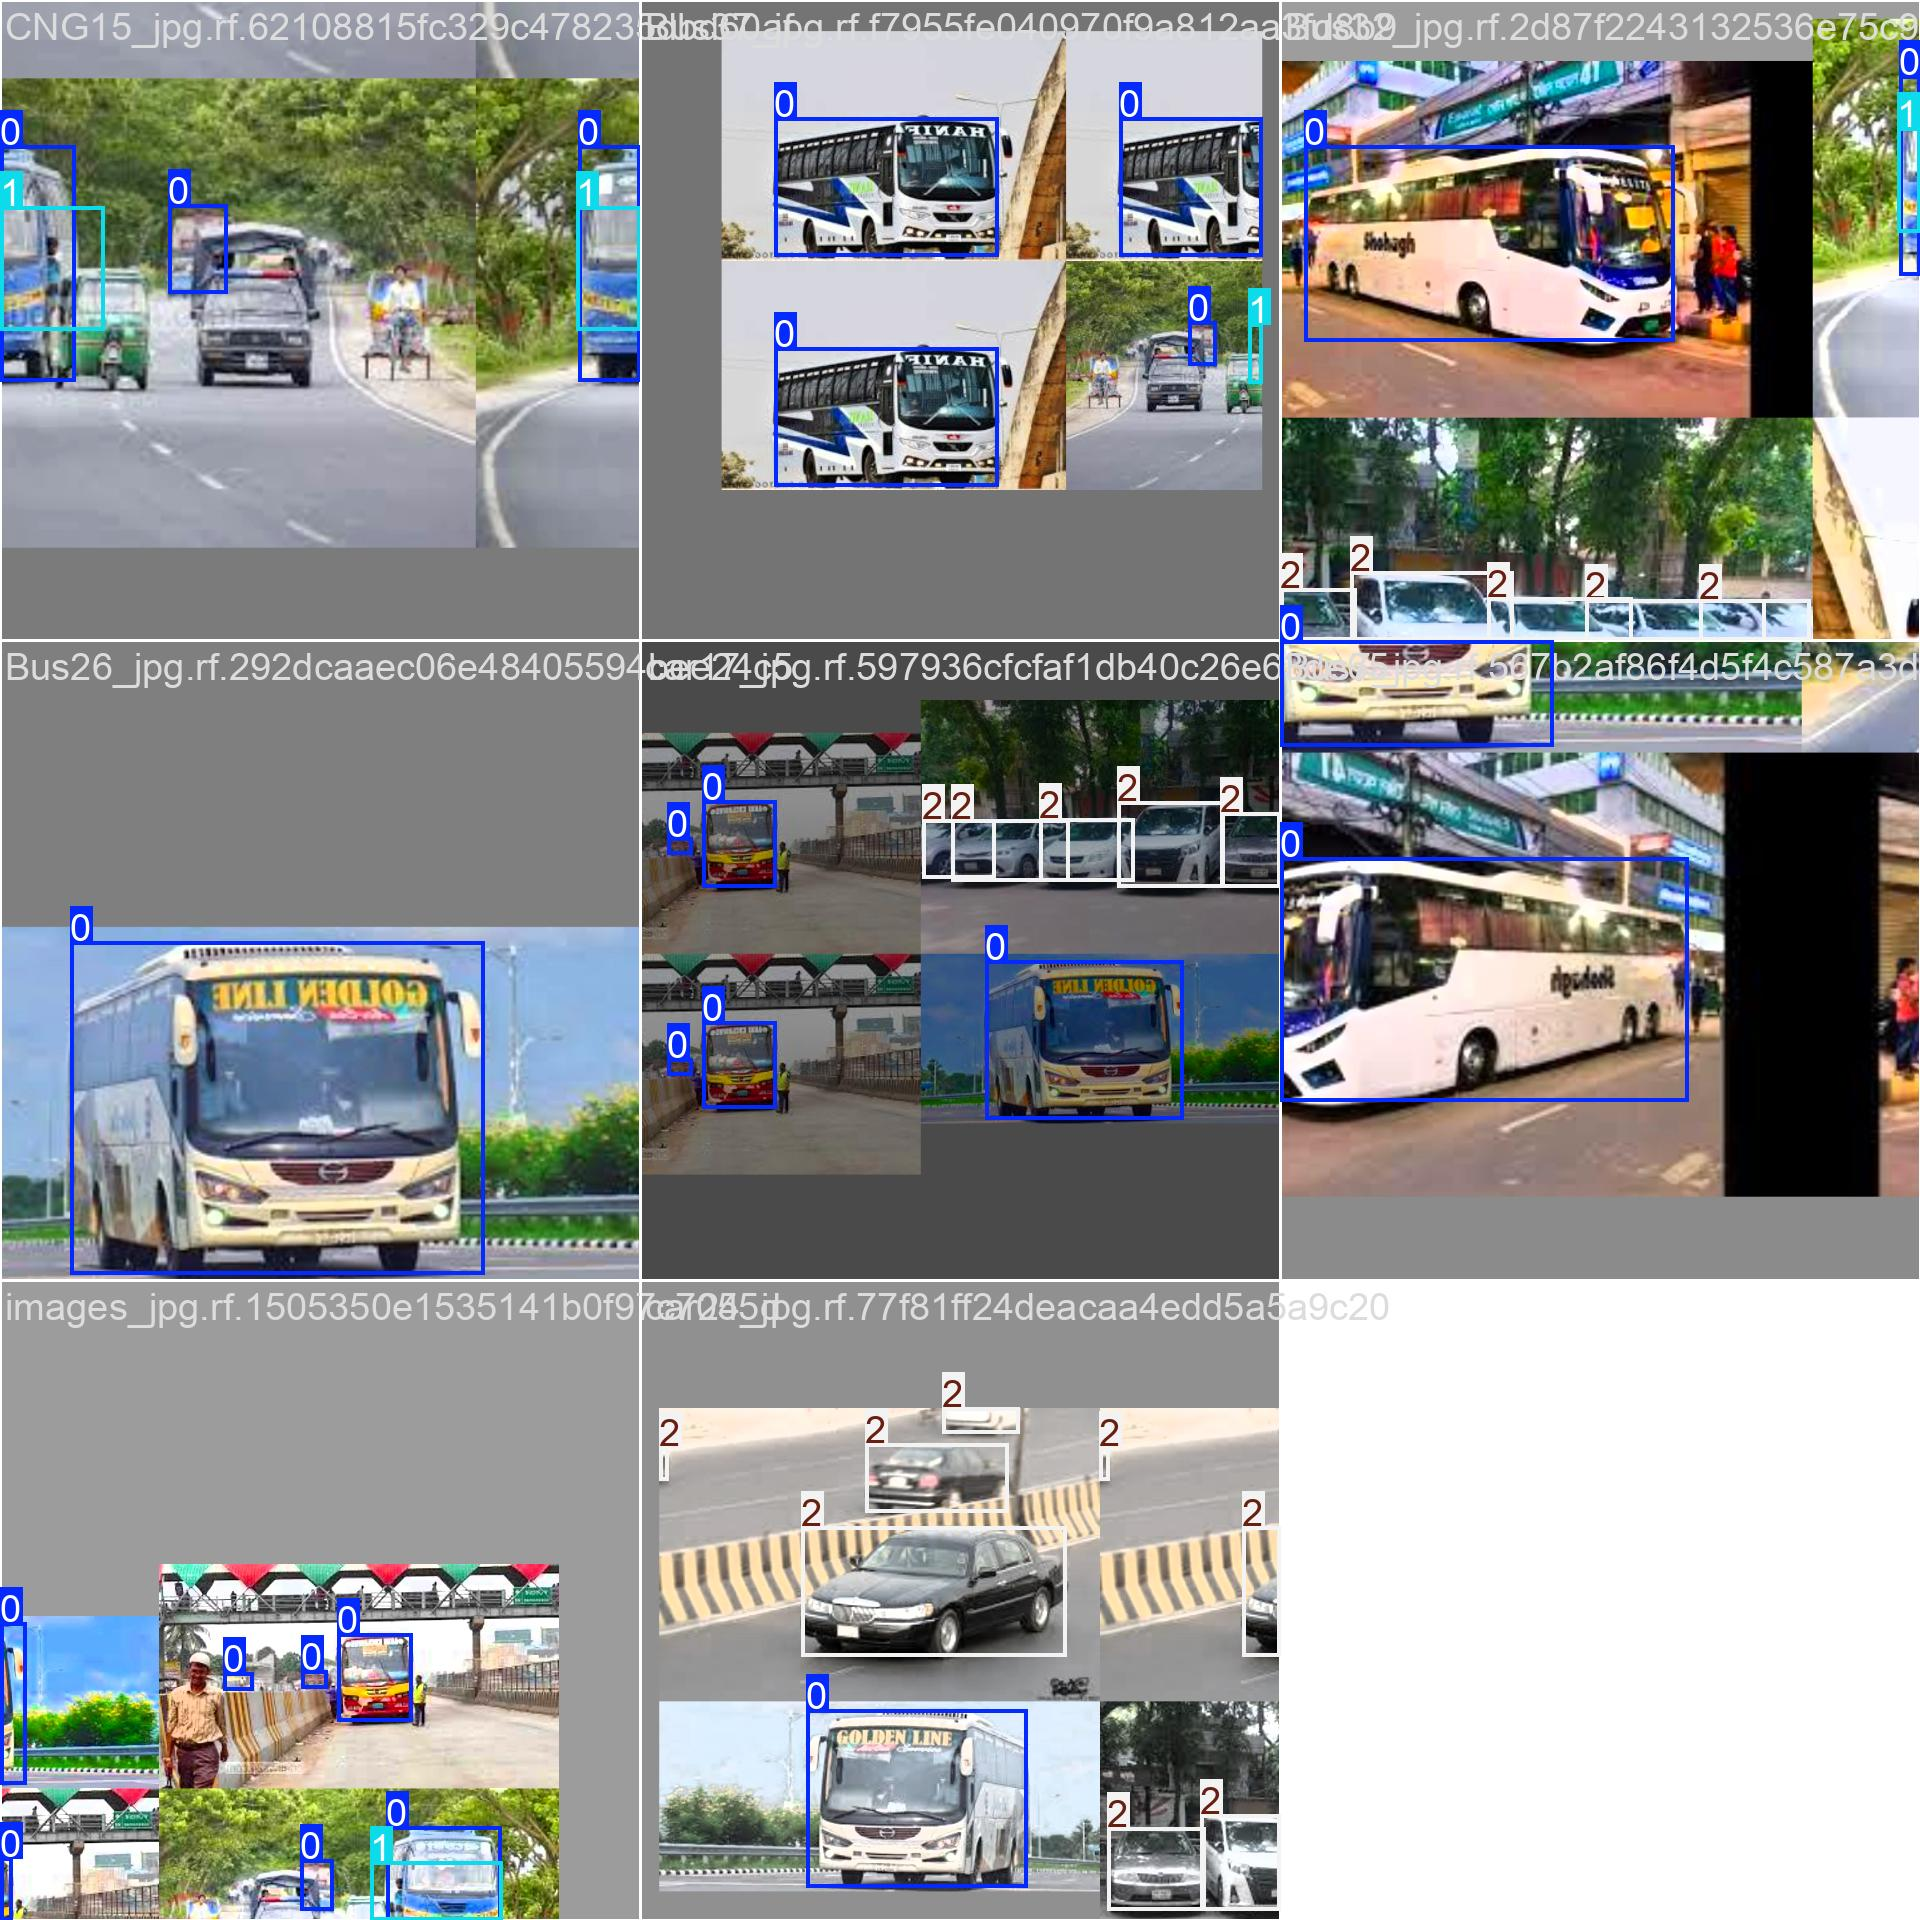

In [ ]:
from IPython.display import Image, display

base = '/kaggle/working/runs/detect/bangladesh_vehicle2/'

display(Image(base + 'results.png'))
display(Image(base + 'confusion_matrix.png'))
display(Image(base + 'BoxP_curve.png'))
display(Image(base + 'train_batch0.jpg'))


In [ ]:
import pandas as pd

results_df = pd.read_csv(
    '/kaggle/working/runs/detect/bangladesh_vehicle2/results.csv'
)

print("Last 5 Epochs:")
print(results_df.tail())

print("\n=== Best Performance ===")
print(f"Best mAP50: {results_df['metrics/mAP50(B)'].max():.3f}")
print(f"Best mAP50-95: {results_df['metrics/mAP50-95(B)'].max():.3f}")


Last 5 Epochs:
    epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
45     46  2174.35         0.75048         1.76922         0.96723   
46     47  2222.84         0.72501         1.83711         1.06318   
47     48  2266.15         0.68673         1.73456         0.96467   
48     49  2314.05         0.70188         1.71743         0.96057   
49     50  2361.76         0.77392         1.86131         0.97675   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
45               0.60376            0.56215           0.61774   
46               0.61214            0.56238           0.61751   
47               0.88409            0.47530           0.62133   
48               0.87917            0.44200           0.61791   
49               0.89445            0.45920           0.61674   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
45              0.47831       0.91271       1.68970       1.09505  0.000467   
46             

In [ ]:
from ultralytics import YOLO

model = YOLO('/kaggle/working/runs/detect/bangladesh_vehicle2/weights/best.pt')

results = model.predict(
    source='/kaggle/input/vechicle/test/images/',
    save=True,
    conf=0.5,
    project='/kaggle/working/runs/detect',
    name='test_results'
)

print(f"✓ Tested on {len(results)} images")



image 1/12 /kaggle/input/vechicle/test/images/Bus40_jpg.rf.a07a7e6eb44f4c724a7a8fe14ed40c9b.jpg: 416x640 2 cars, 149.1ms
image 2/12 /kaggle/input/vechicle/test/images/Bus48_jpg.rf.d24fe1e13128b2e521ba7f727e8a581d.jpg: 384x640 1 car, 2 buss, 138.6ms
image 3/12 /kaggle/input/vechicle/test/images/CNG16_jpg.rf.9eded2927f8b37a8144bc2882d6dab91.jpg: 384x640 1 car, 1 bus, 114.9ms
image 4/12 /kaggle/input/vechicle/test/images/car13_jpg.rf.0a37a61e6b5d2a9f5252bc9fcf508047.jpg: 384x640 3 buss, 111.4ms
image 5/12 /kaggle/input/vechicle/test/images/car18_jpg.rf.3970f0ff6af4d15c55e0f6d92c09f254.jpg: 448x640 1 bus, 142.3ms
image 6/12 /kaggle/input/vechicle/test/images/car20_jpg.rf.202a448c4f7511e0ea98fecbbb76a6c8.jpg: 480x640 1 bus, 144.4ms
image 7/12 /kaggle/input/vechicle/test/images/car31_jpg.rf.b8f9e46c1f3b81bfeb732d819528bd3c.jpg: 256x640 1 bus, 99.7ms
image 8/12 /kaggle/input/vechicle/test/images/car40_jpg.rf.a37b8960934090e0b7ab36306c279c07.jpg: 640x480 1 bus, 141.3ms
image 9/12 /kaggle/inpu

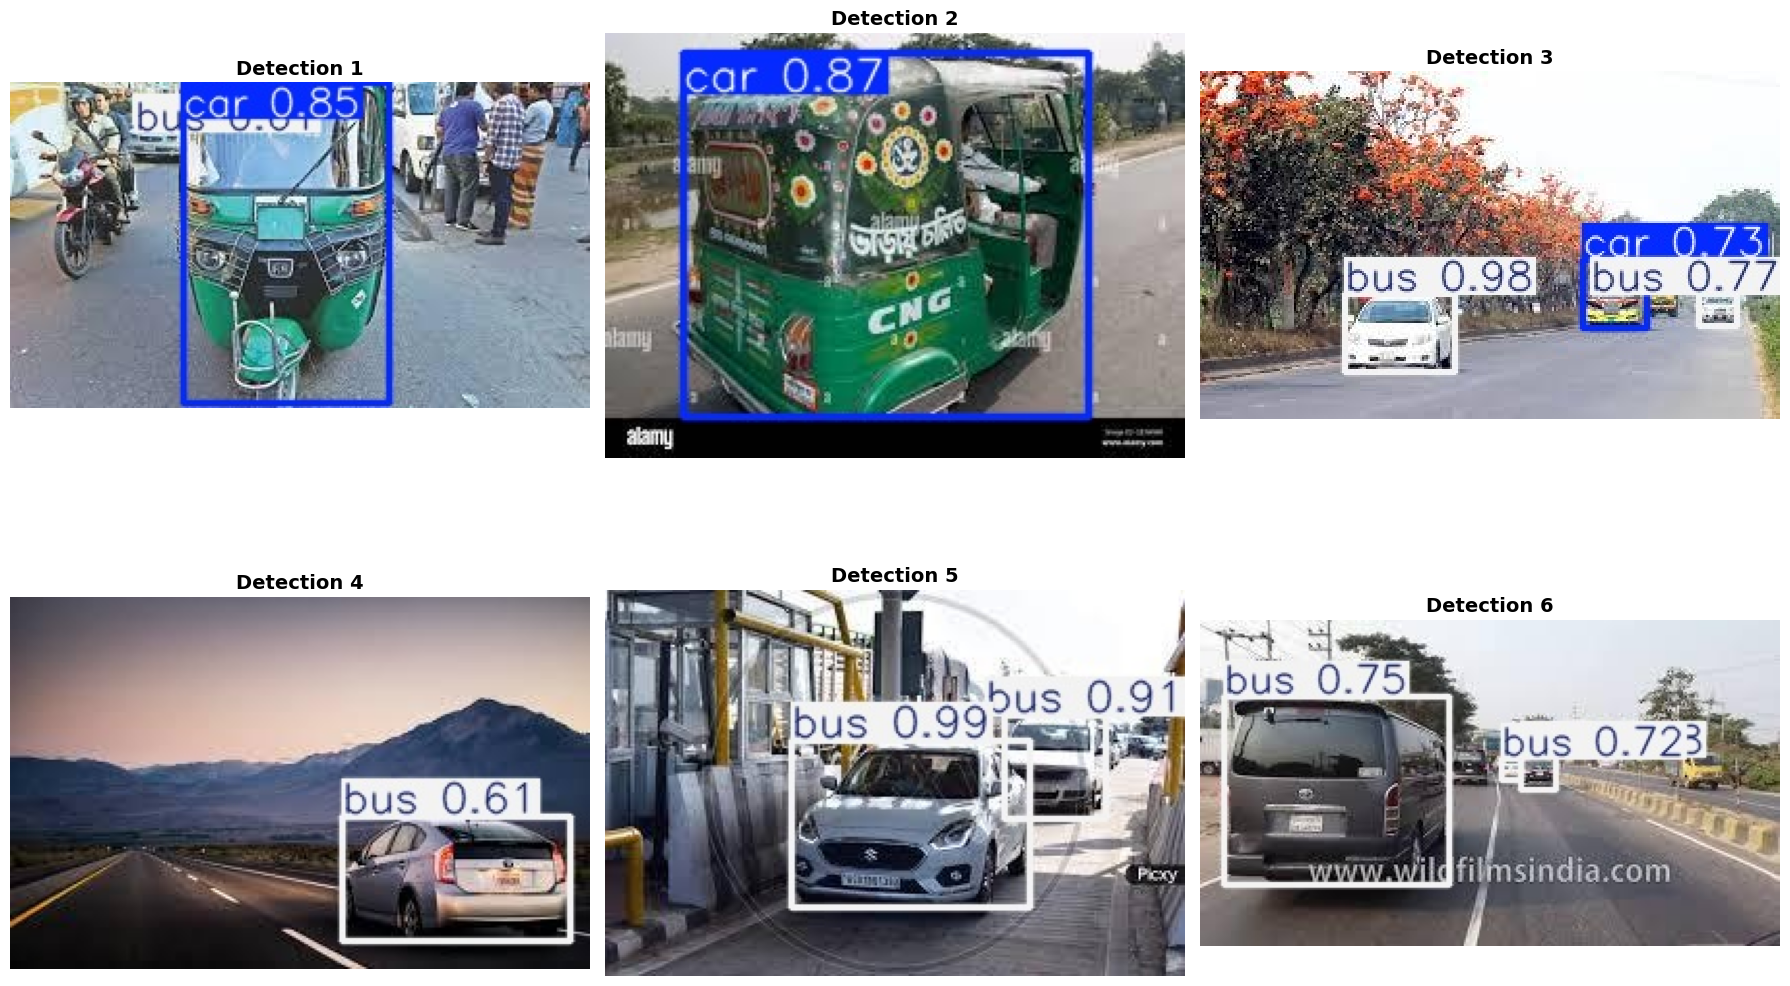

✓ Total test images processed: 12


In [ ]:
import glob
import matplotlib.pyplot as plt

# Get result images
result_imgs = glob.glob('/kaggle/working/runs/detect/test_results/*.jpg')

# Show first 6 detections
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
for i, img_path in enumerate(result_imgs[:6]):
    ax = axes[i//3, i%3]
    img = plt.imread(img_path)
    ax.imshow(img)
    ax.set_title(f'Detection {i+1}', fontsize=14, fontweight='bold')
    ax.axis('off')
plt.tight_layout()
plt.show()

print(f"✓ Total test images processed: {len(result_imgs)}")

In [ ]:
from ultralytics import YOLO

model = YOLO('/kaggle/working/runs/detect/bangladesh_vehicle2/weights/best.pt')

metrics = model.val(data='/kaggle/working/data.yaml')

print("\n=== Overall Performance ===")
print(f"mAP50: {metrics.box.map50:.3f}")
print(f"mAP50-95: {metrics.box.map:.3f}")
print(f"Precision: {metrics.box.mp:.3f}")
print(f"Recall: {metrics.box.mr:.3f}")

print("\n=== Per Class Performance ===")
print(f"Car mAP50: {metrics.box.maps[0]:.3f}")
print(f"CNG mAP50: {metrics.box.maps[1]:.3f}")
print(f"Bus mAP50: {metrics.box.maps[2]:.3f}")


Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
Model summary (fused): 73 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.6±0.1 ms, read: 25.5±9.2 MB/s, size: 10.1 KB)
val: Scanning /kaggle/input/vechicle/valid/labels... 23 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 23/23 573.1it/s 0.0s
WARNING ⚠️ val: Cache directory /kaggle/input/vechicle/valid is not writable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 80, len(boxes) = 99. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.6s/it 3.2s6.3s
                   all         23         99       0.65      0.559      0.633      0.506
                   car          9         13

In [ ]:
# Create final output folder
!mkdir -p /kaggle/working/final_output

# Copy trained model
!cp /kaggle/working/runs/detect/bangladesh_vehicle2/weights/best.pt \
    /kaggle/working/final_output/best_model.pt

# Copy training results
!cp /kaggle/working/runs/detect/bangladesh_vehicle2/results.png \
    /kaggle/working/final_output/

!cp /kaggle/working/runs/detect/bangladesh_vehicle2/confusion_matrix.png \
    /kaggle/working/final_output/

!cp /kaggle/working/runs/detect/bangladesh_vehicle2/results.csv \
    /kaggle/working/final_output/

# Copy test results
!mkdir -p /kaggle/working/final_output/test_samples
!cp /kaggle/working/runs/detect/test_results/*.jpg \
    /kaggle/working/final_output/test_samples/

# Verify
!ls -lh /kaggle/working/final_output/


total 6.4M
-rw-r--r-- 1 root root 6.0M Jan 26 11:33 best_model.pt
-rw-r--r-- 1 root root 103K Jan 26 11:33 confusion_matrix.png
-rw-r--r-- 1 root root 9.1K Jan 26 11:33 results.csv
-rw-r--r-- 1 root root 321K Jan 26 11:33 results.png
drwxr-xr-x 2 root root 4.0K Jan 26 11:32 test_samples


In [ ]:
#Assignment

from ultralytics import YOLO
model = YOLO('/kaggle/working/runs/detect/bangladesh_vehicle2/weights/best.pt')
results = model.predict(
    source='/kaggle/input/traffic-f',
    save=True,
    conf=0.5,
    project='/kaggle/working/runs/detect',
    name='video_results'
)


print("✓ Video detection complete!")
print("✓ Video saved to: /kaggle/working/runs/detect/video_results/")


WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/1802) /kaggle/input/traffic-f/traffic.mp4: 384x640 16 buss, 158.6ms
video 1/1 (frame 2/1802) /kaggle/input/traffic-f/traffic.mp4: 384x640 12 buss, 109.3ms
video 1/1 (frame 3/1802) /kaggle/input/traffic-f/traffic.mp4: 384x640 1 car, 13 buss, 108.3ms
video 1/1 (frame 4/1802) /kaggle/input/traffic-f/traffic.mp4: 384x640 1 car, 11 buss, 110.5ms
video 1/1 (frame 5/1802) /kaggle/input/traffic-f/traffic.mp4: 384x640 12 buss, 100.7ms
video 1/1

In [ ]:
!ls /kaggle/working/runs/detect/video_results/


traffic.avi


In [ ]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')

results = model.train(
    data='/kaggle/working/data.yaml',
    epochs=50,
    imgsz=640,
    batch=8,
    name='bangladesh_vehicle'
)
print("✓ Video detection complete!")
print("✓ Video saved to: /kaggle/working/runs/detect/video_results/")

In [4]:
!pip install ultralytics -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.2 MB/s eta 0:00:00


In [5]:
from ultralytics import YOLO

model = YOLO('/content/best.pt')
results = model.predict(
    source='/content/Heavy traffic is at the street of Dhaka Bangladesh..mp4',
    save=True,
    conf=0.5,
    project='/content/runs/detect',
    name='video_results'
)



WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/258) /content/Heavy traffic is at the street of Dhaka Bangladesh..mp4: 640x384 7 cars, 5 buss, 128.7ms
video 1/1 (frame 2/258) /content/Heavy traffic is at the street of Dhaka Bangladesh..mp4: 640x384 7 cars, 5 buss, 154.9ms
video 1/1 (frame 3/258) /content/Heavy traffic is at the street of Dhaka Bangladesh..mp4: 640x384 7 cars, 6 buss, 129.3ms
video 1/1 (frame 4/258) /content/Heavy traffic is at the street of Dhaka Bangladesh..mp4: 64

In [ ]:
from ultralytics import YOLO

model = YOLO('/content/best.pt')
results = model.predict(
    source='/content/Traffic Signal In Dhaka City (part-2) - Transport World (720p, h264).mp4',
    save=True,
    conf=0.5,
    project='/content/runs/detect',
    name='video_results'
)



WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/8044) /content/Traffic Signal In Dhaka City (part-2) - Transport World (720p, h264).mp4: 384x640 5 buss, 138.4ms
video 1/1 (frame 2/8044) /content/Traffic Signal In Dhaka City (part-2) - Transport World (720p, h264).mp4: 384x640 6 buss, 133.4ms
video 1/1 (frame 3/8044) /content/Traffic Signal In Dhaka City (part-2) - Transport World (720p, h264).mp4: 384x640 5 buss, 128.4ms
video 1/1 (frame 4/8044) /content/Traffic Signal In Dhaka City

In [ ]:
from ultralytics import YOLO
import cv2

model = YOLO('/content/best.pt')

results = model.predict(
    source='/content/Traffic Signal In Dhaka City (part-2) - Transport World (720p, h264).mp4',
    save=True,
    conf=0.5,
    project='/content/runs/detect',
    name='video_results',
    vid_stride=1
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/8044) /content/Traffic Signal In Dhaka City (part-2) - Transport World (720p, h264).mp4: 384x640 5 buss, 65.1ms
video 1/1 (frame